# Madgwick bias analysis

The goal of this experiment is to estimate how much drift we will suffer from using Madgwick's algorithm. The gain was set to 0.1 and the setup was hold still on a table using a light weight. Before the experiment start, the setup was left to stabilize for ~10 minutes. The temperature, as reported by the IMU was about 40°C.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
df = pd.read_csv('madgwick_bias.csv')
df.head()

,ts,X,Y,Z
0,1034704600,-3.133484,-0.116582,-0.316783
1,1034708600,-3.133468,-0.116580,-0.316783
2,1034712600,-3.133438,-0.116575,-0.316785
3,1034720600,-3.133423,-0.116573,-0.316786
4,1034724600,-3.133408,-0.116570,-0.316787


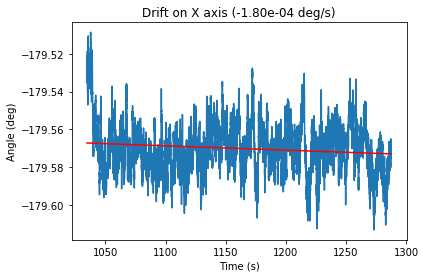

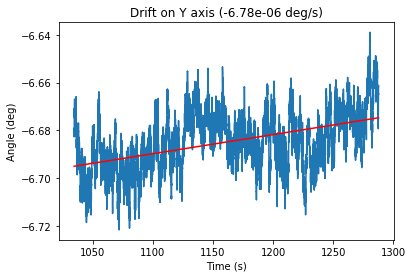

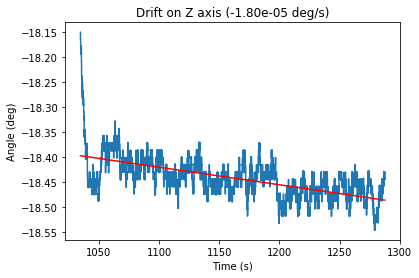

In [13]:
for axis in 'XYZ':
    coeff = np.polyfit(df['ts'], df[axis], 1)
    drift = np.degrees(coeff[1]/1e6)
    plt.figure()
    plt.plot(df['ts']*1e-6, np.degrees(df[axis]))
    plt.plot(df['ts']*1e-6, np.degrees(np.polyval(coeff, df['ts'])), 'r')
    plt.ylabel('Angle (deg)')
    plt.xlabel('Time (s)')
    plt.title('Drift on {} axis ({:.2e} deg/s)'.format(axis, drift))
    plt.gcf().savefig('madgwick_drift_{}.pdf'.format(axis))
    plt.show()